# Pattern Recognision and Machine Learning
By **Tzanetis Savvas**(10889) and **Zoidis Vasilis**(10652).

## Part A1
In the first part of the assignment we will estimate the parameters $θ_1$ and $θ_2$ using **Maximum Likelihood Estimation** as well as visualize $\log(p(D1|θ))$ and $\log(p(D2|θ))$ as functions of **$\theta$**.

First things first, we need to import any nessecary libraries to our project like **numpy** for mathematical operations and **matplotlib** for displaying graphs and results.

In [39]:
import numpy as np
import matplotlib.pyplot as plt


In this code, **D1** will hold the training dataset showing **no stress** ( $ω_1$ ) and **D2** the training dataset showing **stress** ( $ω_2$ ).

In [40]:
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])  # ω1: no stress
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])          # ω2: stress

Given the **PDF** function for the indicator $x$:
$$ p(x|θ) = \frac{1}{π(1+(x-θ)^2)} $$

Which also happens to be the **Cauchy distribution** for **$x$** given **$θ$**, we can caluclate the **log-likelyhood** function for a dataset **$D$** like so:
$$ \log(p(D|θ) = \sum_{x \in D} \log \left( \frac{\pi}{1 + (x - \theta)^2} \right) $$
The reason we are using a log-likelyhood instead of a regular likelyhood function is because the logarithms simplify the computation needed by converting products into sums, and since logarithms are also monotonic functions, maximazing the log-likelyhood $\log{L(\theta|D)}$ is equivalent to maximizing the likelyhood $L(\theta|D)$.

This can be achieved in the code by declearing a **log_likelyhood** function.

In [41]:
def log_likelihood(D, theta):
    return -len(D) * np.log(np.pi) - np.sum(np.log(1 + (D[:, None] - theta)**2), axis = 0)

In order to Estimate the $\hat{\theta}_1$ and $\hat{\theta}_2$ values, we need to define a range of $\theta$ values that will likely contain the actual $\theta$. Since the data range spans between $[-4.5, 4.1]$, we just need to select a wider candidate range for $\theta$. We will be using $[-6, 6]$.

Lastly, in order to visualize our results, we need to define the previously selected range of candidate **$\theta$** values in our code, compute the values $\log(p(D1|θ))$ and $\log(p(D2|θ))$ as well as $\hat{\theta}_1$ and $\hat{\theta}_2$, and plot the results using the **matplotlib** library.

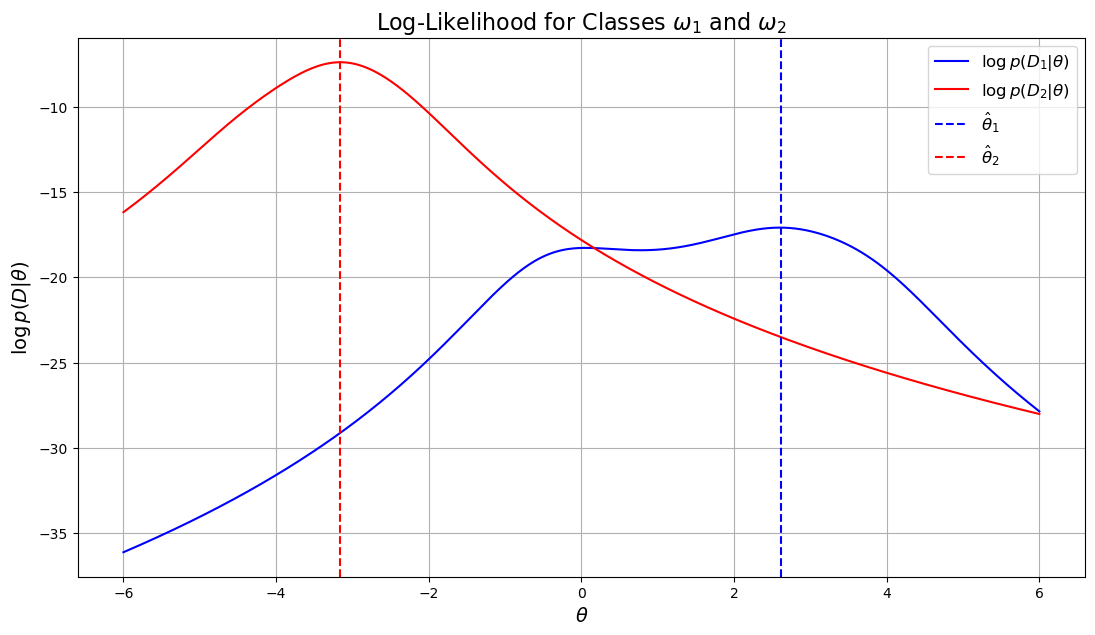

Estimated θ1 (no stress): 2.61
Estimated θ2 (stress): -3.16


In [42]:
theta_range = np.linspace(-6, 6, 500)
log_p_D1 = log_likelihood(D1, theta_range)
log_p_D2 = log_likelihood(D2, theta_range)

theta_hat_1 = theta_range[np.argmax(log_p_D1)]
theta_hat_2 = theta_range[np.argmax(log_p_D2)]

plt.figure(figsize=(13, 7))
plt.plot(theta_range, log_p_D1, label=r'$\log p(D_1|\theta)$', color='blue')
plt.plot(theta_range, log_p_D2, label=r'$\log p(D_2|\theta)$', color='red')
plt.axvline(theta_hat_1, color='blue', linestyle='--', label=r'$\hat{\theta}_1$')
plt.axvline(theta_hat_2, color='red', linestyle='--', label=r'$\hat{\theta}_2$')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\log p(D|\theta)$', fontsize=14)
plt.title('Log-Likelihood for Classes $\\omega_1$ and $\\omega_2$', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

print(f"Estimated θ1 (no stress): {theta_hat_1:.2f}")
print(f"Estimated θ2 (stress): {theta_hat_2:.2f}")

## Part A2
Here we are tasked with classifying the two datasets $D_1$ and $D_2$, using the discriminant function:
$$ g(x) = \log{P(x|\hat{\theta}_1)} - \log{P(x|\hat{\theta}_2)} + \log{P(\omega_1)} - \log{P(\omega_2)} $$

In [43]:
P1 = 7/12
P2 = 5/12

def predict(x, theta1, theta2, P1, P2):
    log_p1 = -np.log(1 + (x - theta1)**2)
    log_p2 = -np.log(1 + (x - theta2)**2)
    prior_ratio = np.log(P1 / P2)
    return log_p1 - log_p2 + prior_ratio

And after plotting $g(x)$:

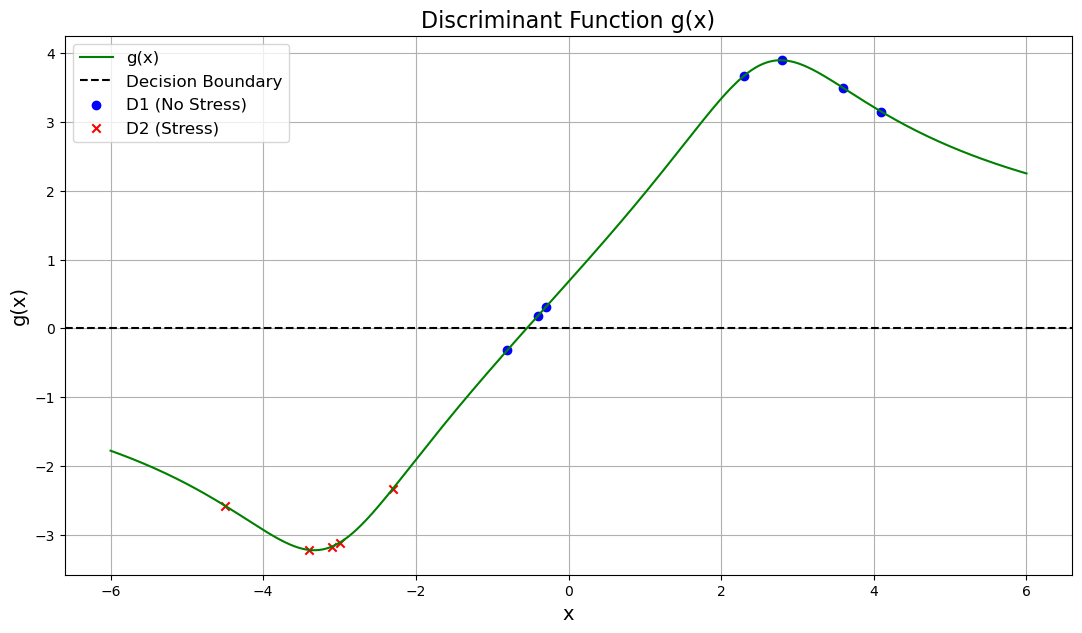

In [44]:
x_range = np.linspace(-6, 6, 500)
g_values = predict(x_range, theta_hat_1, theta_hat_2, P1, P2)

g_D1 = predict(D1, theta_hat_1, theta_hat_2, P1, P2)
g_D2 = predict(D2, theta_hat_1, theta_hat_2, P1, P2)

plt.figure(figsize=(13, 7))
plt.plot(x_range, g_values, label='g(x)', color='green')
plt.axhline(0, color='black', linestyle='--', label='Decision Boundary')
plt.scatter(D1, g_D1, color='blue', label='D1 (No Stress)', marker='o')
plt.scatter(D2, g_D2, color='red', label='D2 (Stress)', marker='x')
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.title('Discriminant Function g(x)', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Decision Rule
The decision boundary is $g(x) = 0$. More specifically:
- Points that are above the decision boundary ( $g(x) > 0$ ) are classified as $\omega_1$ (no stress).
- Points that are below the decision boundary ( $g(x) < 0$ ) are classified as $\omega_2$ (stress).
### Observations
The classification rule leads us to having some misclassifications. Even though these misclassifications exist, the desicion rule works well enough, classifying correctly almost all values **( 11 out of 12)**. More specifically:
- 11 out of 12 values of the $D_1$ dataset are classified correctly.
- All of the values of the $D_2$ dataset are classified correctly.

We should avoid to further improve our model, as trying to do so may lead us to **overfitting**, preventing our model to generalize and classify correclty unseen cases.
